--- Verinin İlk 5 Satırı ---
   Unnamed: 0  Fiyat  Oda_Sayısı  Net_m2  Katı  Yaşı
0           0    475           1      40     0     6
1           1    475           1      55     0     5
2           2    450           1      50     0     7
3           3    450           1      55     1     6
4           4    475           1      45     2     7

--- Veri Seti Boyutu ---
(191, 6)

--- İstatistiksel Özet ---
       Unnamed: 0        Fiyat  Oda_Sayısı      Net_m2        Katı        Yaşı
count    191.0000   191.000000  191.000000  191.000000  191.000000  191.000000
mean      95.0000   649.476440    2.340314   85.183246    3.931937   12.753927
std       55.2811   111.064174    0.721401   16.482620    3.752974    8.374596
min        0.0000   450.000000    1.000000   40.000000    0.000000    0.000000
25%       47.5000   575.000000    2.000000   80.000000    0.000000    4.000000
50%       95.0000   650.000000    2.000000   90.000000    3.000000   16.000000
75%      142.5000   700.000000    3.0

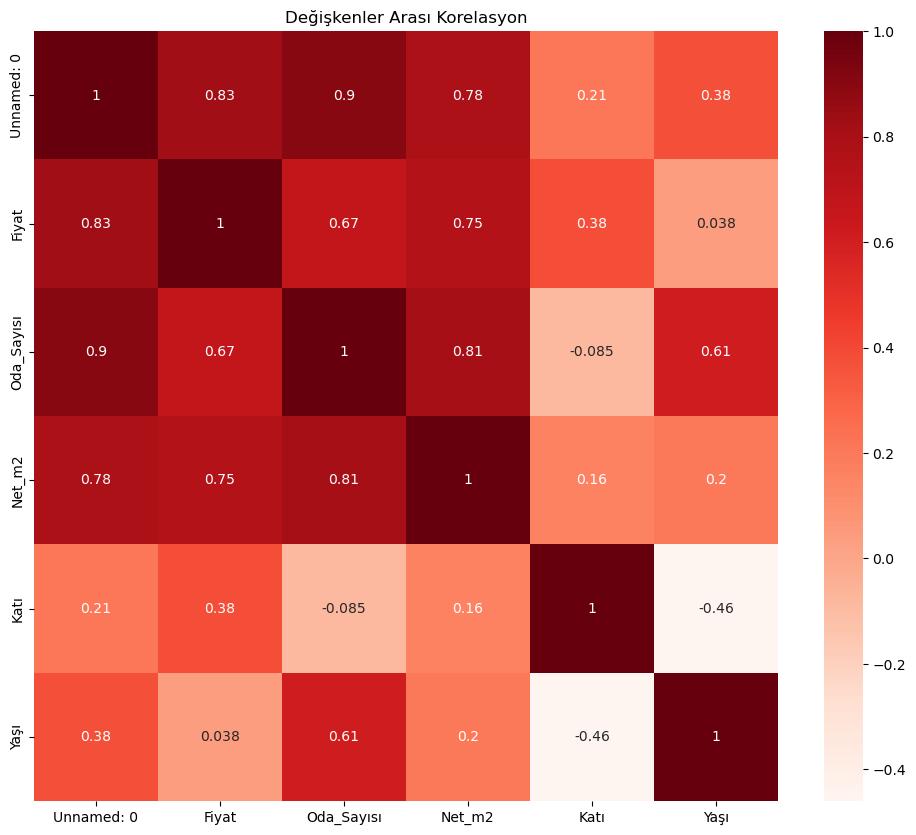

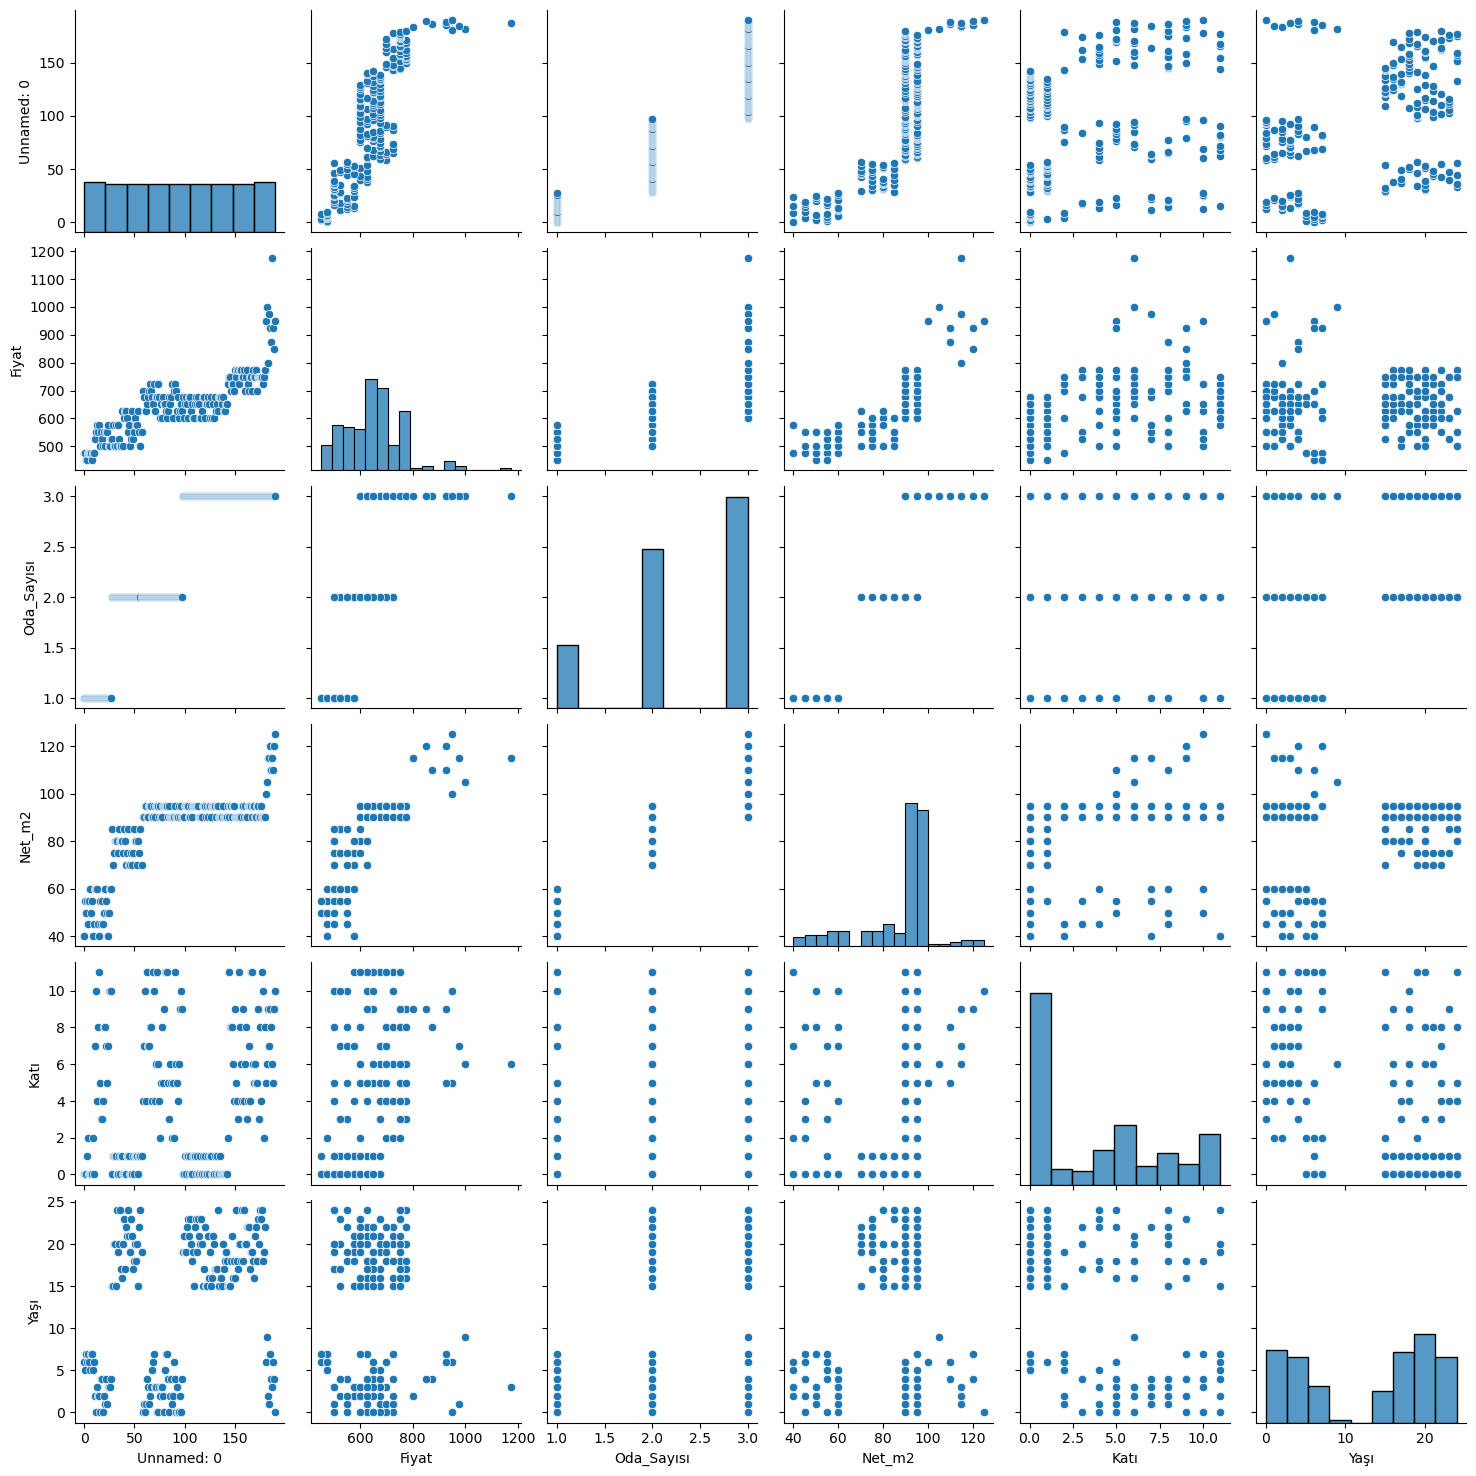

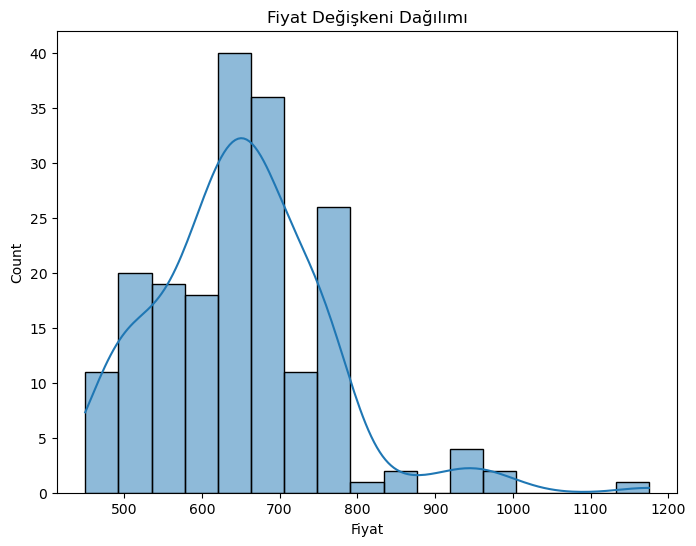


--- Model Parametreleri ---
Sabit (Intercept): 305.162589528776
            Öznitelik_Katsayıları
Oda_Sayısı             118.350670
Net_m2                   1.133092
Katı                     7.096886
Yaşı                    -4.665706

--- Test Seti Tahminleri ---
[706.59771491 654.37003543 747.7476064  692.28564638 720.47653797
 537.57127776 459.7021826  521.31775431 669.87851125 686.30681024
 682.87587641 720.79148736 488.46115633 725.65384704 686.30681024
 781.01399849 725.65384704 696.95135276 716.92888167 518.53483344
 540.6285928  504.51802648 648.90122835 673.54446364 687.81659329
 660.54709848 720.47653797 502.88994734 530.29742604 665.32952734
 728.69147428 693.91372552 457.8390849  695.63822301 708.91059866
 714.89100842 686.30681024 779.77922594 822.96699067]


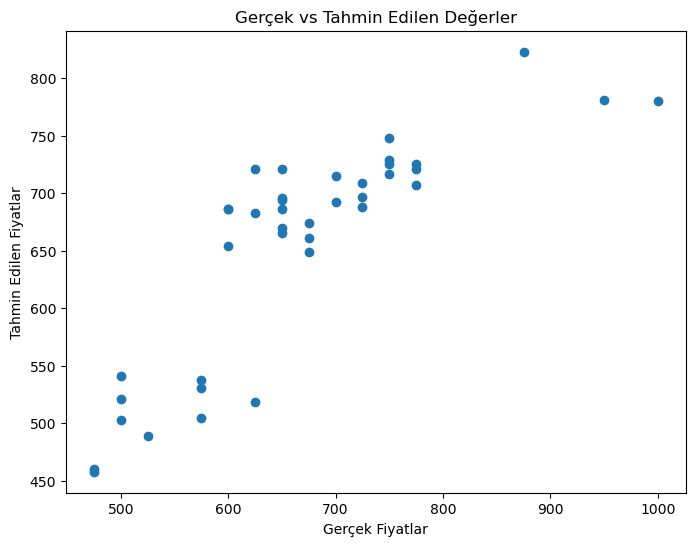


Tahmin Edilen Ev Fiyatı: ₺770.251


/home/berkyilmaz/anaconda3/envs/machine_learning/lib/python3.14/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [3]:
########## Çoklu Doğrusal Regresyon: Üsküdar Emlak Fiyat Tahmini ##########

# 1. Gerekli Kütüphanelerin Yüklenmesi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

# 2. Veri Setinin Okunması ve Ön İnceleme
# Dropbox üzerinden veriyi çekiyoruz
veri = pd.read_excel('https://www.dropbox.com/s/luoopt5biecb04g/SATILIK_EV1.xlsx?dl=1')

print("--- Verinin İlk 5 Satırı ---")
print(veri.head())

print("\n--- Veri Seti Boyutu ---")
print(veri.shape)

print("\n--- İstatistiksel Özet ---")
print(veri.describe())

print("\n--- Eksik Veri Kontrolü ---")
print(veri.isnull().any())

# 3. Veri Görselleştirme (EDA)
# Korelasyon Isı Haritası
plt.figure(figsize=(12,10))
cor = veri.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.title("Değişkenler Arası Korelasyon")
plt.show()

# Serpilme Diyagramları (Pairplot)
sns.pairplot(veri)
plt.show()

# Hedef Değişken (Fiyat) Dağılımı
plt.figure(figsize=(8,6))
sns.histplot(veri['Fiyat'], kde=True)
plt.title("Fiyat Değişkeni Dağılımı")
plt.show()

# 4. Model Hazırlığı ve Eğitim
# Bağımsız değişkenler (X) ve Bağımlı değişken (y) tanımlanıyor
X = veri[['Oda_Sayısı', 'Net_m2', 'Katı', 'Yaşı']]
y = veri['Fiyat']

# Veriyi %80 Eğitim, %20 Test olarak bölüyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelin kurulması ve eğitilmesi
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Model Katsayılarının İncelenmesi
print("\n--- Model Parametreleri ---")
print("Sabit (Intercept):", model.intercept_)

# Katsayıları bir tabloda görelim
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Öznitelik_Katsayıları'])
print(coeff_df)

# 6. Tahmin ve Değerlendirme
# Test seti üzerinden tahmin yapma
y_pred_test = model.predict(X_test)
print("\n--- Test Seti Tahminleri ---")
print(y_pred_test)

# Gerçek ve Tahmin edilen değerlerin karşılaştırılması (Scatter Plot)
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_test)
plt.xlabel('Gerçek Fiyatlar')
plt.ylabel('Tahmin Edilen Fiyatlar')
plt.title('Gerçek vs Tahmin Edilen Değerler')
plt.show()

# 7. Yeni Bir Örnek İçin Tahmin Yapma
# Senaryo: 3 odalı, 105 m2, 4. kat, 8 yıllık bina
Oda_Sayısı = 3
Net_m2 = 105
Katı = 4
Yaşı = 8

yeni_tahmin = model.predict([[Oda_Sayısı, Net_m2, Katı, Yaşı]])
print(f"\nTahmin Edilen Ev Fiyatı: ₺{yeni_tahmin[0]:.3f}")

In [4]:
# 8. Model Performans Metriklerini Hesaplayalım
print("\n--- Model Performans Değerlendirmesi ---")

# Ortalama Mutlak Hata (MAE)
print('MAE (Mean Absolute Error):', metrics.mean_absolute_error(y_test, y_pred_test))

# Ortalama Kare Hata (MSE)
print('MSE (Mean Square Error):', metrics.mean_squared_error(y_test, y_pred_test))

# Kök Ortalama Kare Hata (RMSE)
print('RMSE (Root Mean Square Error):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

# R-Kare (Belirleme Katsayısı)
# Bu değer 1'e ne kadar yakınsa model veriyi o kadar iyi açıklıyor demektir.
print('R-Square (R2 Score):', metrics.r2_score(y_test, y_pred_test))


--- Model Performans Değerlendirmesi ---
MAE (Mean Absolute Error): 47.305145271279926
MSE (Mean Square Error): 4115.003886902744
RMSE (Root Mean Square Error): 64.14829605611317
R-Square (R2 Score): 0.6987282352837991



--- Artıklar (Residuals) ---
152     68.402285
75     -54.370035
158      2.252394
66       7.714354
60     -95.476538
15      37.428722
9       15.297817
16     -21.317754
128    -19.878511
125    -86.306810
139    -57.875876
156     54.208513
18      36.538844
161     24.346153
112    -36.306810
181    168.986002
155     49.346153
65      28.048647
165     33.071118
42     106.465167
30     -40.628593
24      70.481974
67      26.098772
98       1.455536
69      37.183407
113     14.452902
96     -70.476538
19      -2.889947
45      44.702574
76     -15.329527
169     21.308526
68     -43.913726
5       17.160915
132    -45.638223
90      16.089401
164    -14.891008
108    -86.306810
182    220.220774
186     52.033009
Name: Fiyat, dtype: float64


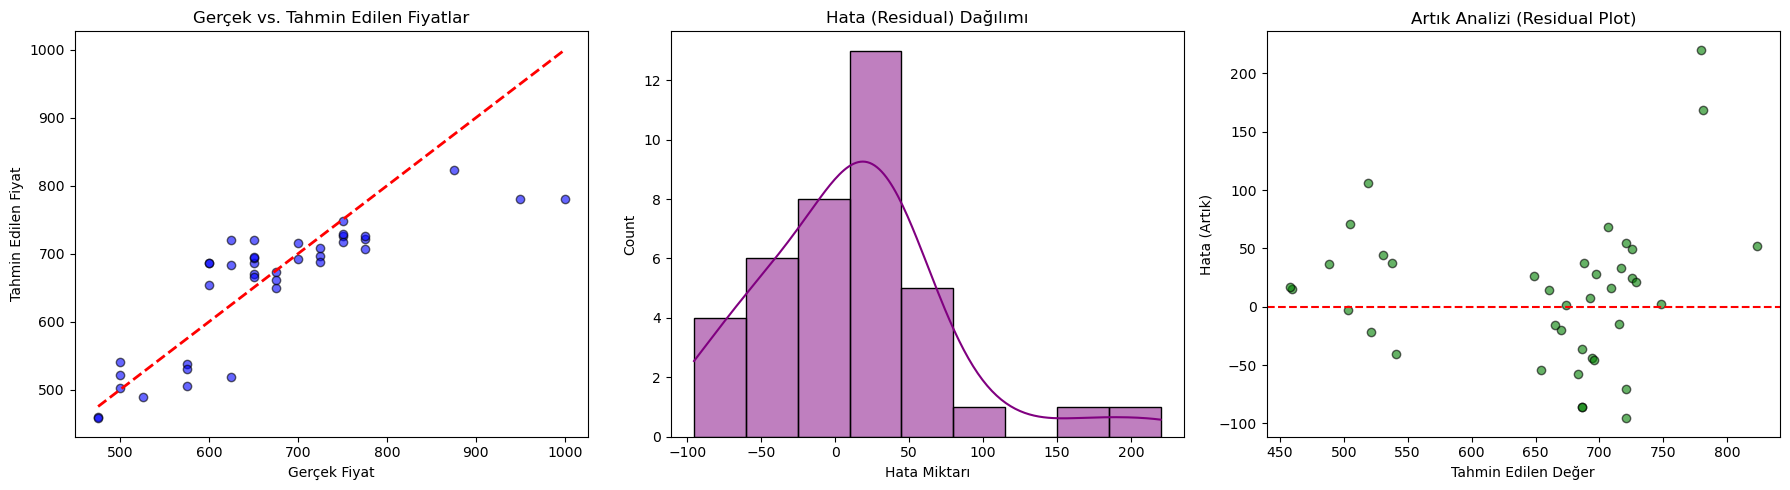

In [5]:
# 9. Üç Temel Performans Grafiği

plt.figure(figsize=(18, 5))

# Grafik 1: Gerçek Değerler vs. Tahmin Edilen Değerler
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_test, color='blue', edgecolors='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Gerçek vs. Tahmin Edilen Fiyatlar')
plt.xlabel('Gerçek Fiyat')
plt.ylabel('Tahmin Edilen Fiyat')

# Grafik 2: Artıkların (Residuals) Dağılımı
# Hataların normal dağılıma ne kadar yakın olduğunu gösterir
plt.subplot(1, 3, 2)
residuals = y_test - y_pred_test
print("\n--- Artıklar (Residuals) ---")
print(residuals)
sns.histplot(residuals, kde=True, color='purple')
plt.title('Hata (Residual) Dağılımı')
plt.xlabel('Hata Miktarı')

# Grafik 3: Artık Analizi (Residual Plot)
# Hataların rassal dağılıp dağılmadığını kontrol eder
plt.subplot(1, 3, 3)
plt.scatter(y_pred_test, residuals, color='green', edgecolors='k', alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Artık Analizi (Residual Plot)')
plt.xlabel('Tahmin Edilen Değer')
plt.ylabel('Hata (Artık)')

plt.tight_layout()
plt.show()


--- Net m2 ve Oda Sayısının Fiyat Üzerindeki Etkisi Analizi Başlatıldı ---
> Net_m2 aralığı: 40.00 - 125.00
> Oda_Sayısı aralığı: 1.00 - 3.00
> Meshgrid oluşturuldu. Boyut: (20, 20)
> Sabit tutulan (ortalama alınan) değişkenler: ['Katı', 'Yaşı']
  - Katı değişkeni 3.93 değerine sabitlendi.
  - Yaşı değişkeni 12.75 değerine sabitlendi.
> Model girişi hazırlandı. Toplam örnek sayısı: 400
> Tahminler yapıldı. Z ekseni (Fiyat) min: 437.24, max: 770.25
> Grafik oluşturuluyor...


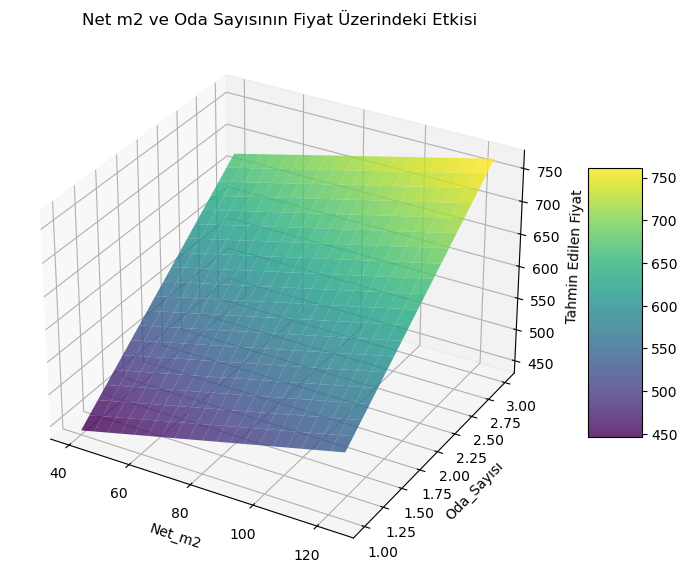


--- Net m2 ve Bina Yaşının Fiyat Üzerindeki Etkisi Analizi Başlatıldı ---
> Net_m2 aralığı: 40.00 - 125.00
> Yaşı aralığı: 0.00 - 24.00
> Meshgrid oluşturuldu. Boyut: (20, 20)
> Sabit tutulan (ortalama alınan) değişkenler: ['Oda_Sayısı', 'Katı']
  - Oda_Sayısı değişkeni 2.34 değerine sabitlendi.
  - Katı değişkeni 3.93 değerine sabitlendi.
> Model girişi hazırlandı. Toplam örnek sayısı: 400
> Tahminler yapıldı. Z ekseni (Fiyat) min: 543.39, max: 751.68
> Grafik oluşturuluyor...


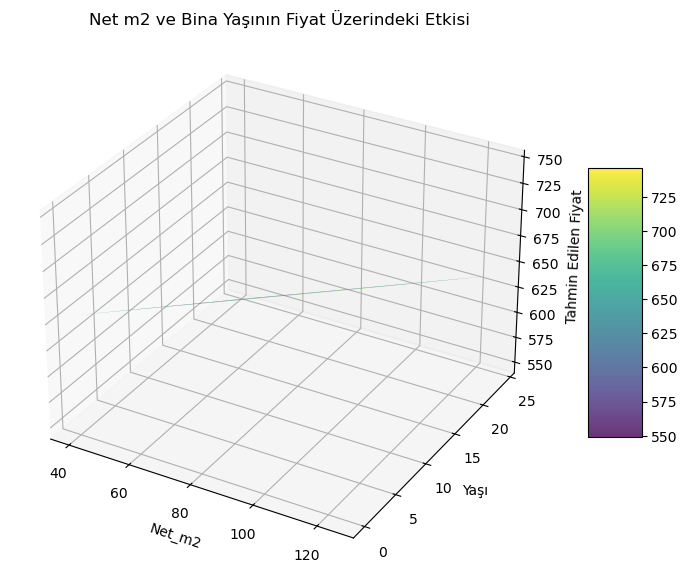

In [6]:
# 10. Tepki Yüzey Grafikleri (Response Surface Plots)
from mpl_toolkits.mplot3d import Axes3D

def plot_surface(feat_x, feat_y, title):
    print(f"\n--- {title} Analizi Başlatıldı ---")
    
    # 1. Değişkenlerin aralıklarını belirleyelim
    x_range = np.linspace(X[feat_x].min(), X[feat_x].max(), 20)
    y_range = np.linspace(X[feat_y].min(), X[feat_y].max(), 20)
    print(f"> {feat_x} aralığı: {x_range.min():.2f} - {x_range.max():.2f}")
    print(f"> {feat_y} aralığı: {y_range.min():.2f} - {y_range.max():.2f}")

    x_mesh, y_mesh = np.meshgrid(x_range, y_range)
    print(f"> Meshgrid oluşturuldu. Boyut: {x_mesh.shape}")

    # 2. Diğer değişkenleri sabit tutalım (ortalama değerlerinde)
    other_feats = [f for f in X.columns if f not in [feat_x, feat_y]]
    print(f"> Sabit tutulan (ortalama alınan) değişkenler: {other_feats}")
    
    # Girdi verisini oluşturma
    input_data = pd.DataFrame({feat_x: x_mesh.ravel(), feat_y: y_mesh.ravel()})
    
    for f in other_feats:
        mean_val = X[f].mean()
        input_data[f] = mean_val
        print(f"  - {f} değişkeni {mean_val:.2f} değerine sabitlendi.")

    # 3. Tahminleri hesapla (Sütun sırasını orijinal X ile aynı yapalım)
    input_data = input_data[X.columns]
    print(f"> Model girişi hazırlandı. Toplam örnek sayısı: {len(input_data)}")
    
    z_predictions = model.predict(input_data).reshape(x_mesh.shape)
    print(f"> Tahminler yapıldı. Z ekseni (Fiyat) min: {z_predictions.min():.2f}, max: {z_predictions.max():.2f}")

    # 4. Çizim
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(x_mesh, y_mesh, z_predictions, cmap='viridis', edgecolor='none', alpha=0.8)

    ax.set_xlabel(feat_x)
    ax.set_ylabel(feat_y)
    ax.set_zlabel('Tahmin Edilen Fiyat')
    ax.set_title(title)
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
    
    print("> Grafik oluşturuluyor...")
    plt.show()

# Fonksiyonları çağıralım
plot_surface('Net_m2', 'Oda_Sayısı', 'Net m2 ve Oda Sayısının Fiyat Üzerindeki Etkisi')
plot_surface('Net_m2', 'Yaşı', 'Net m2 ve Bina Yaşının Fiyat Üzerindeki Etkisi')


ÜÇÜNCÜ ANALİZ: NET_M2 VE KAT İLİŞKİSİ
Veri setindeki Kat aralığı: 0 - 11
Ortalama Kat değeri: 3.93

--- Net m2 ve Katın Fiyat Üzerindeki Etkisi Analizi Başlatıldı ---
> Net_m2 aralığı: 40.00 - 125.00
> Katı aralığı: 0.00 - 11.00
> Meshgrid oluşturuldu. Boyut: (20, 20)
> Sabit tutulan (ortalama alınan) değişkenler: ['Oda_Sayısı', 'Yaşı']
  - Oda_Sayısı değişkeni 2.34 değerine sabitlendi.
  - Yaşı değişkeni 12.75 değerine sabitlendi.
> Model girişi hazırlandı. Toplam örnek sayısı: 400
> Tahminler yapıldı. Z ekseni (Fiyat) min: 567.96, max: 742.34
> Grafik oluşturuluyor...


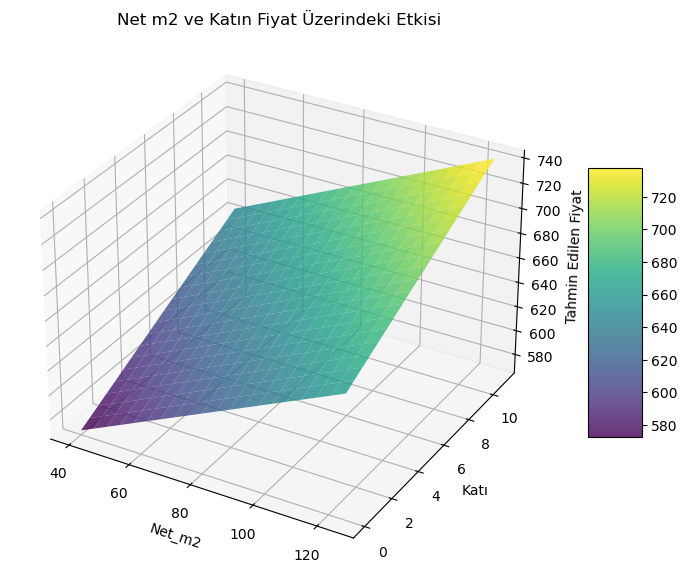


Analiz Tamamlandı: Grafik üzerinde yüksek kat ve yüksek m2'nin fiyatı nasıl 'yukarı' ittiğini gözlemleyebilirsiniz.


In [7]:
# 10.3 Üçüncü RSM Grafiği: Net_m2 ve Katı Değişkenleri
# Fonksiyonu daha önce printli haliyle tanımladığımızı varsayıyoruz. 
# Eğer fonksiyonu henüz güncellemediysen, yukarıdaki "printli" fonksiyon tanımını kullanmalısın.

print("\n" + "="*50)
print("ÜÇÜNCÜ ANALİZ: NET_M2 VE KAT İLİŞKİSİ")
print("="*50)

# Veri setindeki 'Katı' sütununun genel istatistiklerini görelim (Hata payını azaltmak için)
print(f"Veri setindeki Kat aralığı: {X['Katı'].min()} - {X['Katı'].max()}")
print(f"Ortalama Kat değeri: {X['Katı'].mean():.2f}")

# Fonksiyonu çağıralım
plot_surface('Net_m2', 'Katı', 'Net m2 ve Katın Fiyat Üzerindeki Etkisi')

print("\nAnaliz Tamamlandı: Grafik üzerinde yüksek kat ve yüksek m2'nin fiyatı nasıl 'yukarı' ittiğini gözlemleyebilirsiniz.")

In [8]:
from scipy.optimize import minimize
import numpy as np

# Hedef Fonksiyon: Metrekareyi maksimize etmek (Minimize için - ile çarpıyoruz)
def objective(m2):
    return -m2

# Kısıt Fonksiyonu: Bütçe - Hesaplanan Fiyat >= 0 olmalı
def constraint_price(m2, oda, kat, yas, butce):
    intercept = 305.35
    b_oda, b_m2, b_kat, b_yas = 118.35, 1.13, 7.09, -4.66
    
    # Doğrusal regresyon formülü
    hesaplanan_fiyat = intercept + (b_oda * oda) + (b_m2 * m2) + (b_kat * kat) + (b_yas * yas)
    
    # Pozitif değer dönmesi "kısıt sağlandı" demektir
    return butce - hesaplanan_fiyat

# --- Senaryo Parametreleri ---
butce = 1000        # 1.000.000 ₺ (Birim: Bin TL)
istenen_oda = 3
istenen_kat = 2
bina_yasi = 5

print(f"--- Optimizasyon Parametreleri ---")
print(f"Hedef: Maksimum Metrekare")
print(f"Bütçe Limiti: {butce * 1000:,} ₺")
print(f"Sabitler: {istenen_oda} Oda | {istenen_kat}. Kat | {bina_yasi} Yaş")
print("-" * 35)

# Kısıtı tanımlayalım
con = {'type': 'ineq', 'fun': constraint_price, 'args': (istenen_oda, istenen_kat, bina_yasi, butce)}

# Çözüm süreci (Başlangıç tahmini 100 m2, Alt sınır 20, Üst sınır 300 m2)
sol = minimize(objective, x0=100, constraints=con, bounds=[(20, 300)])

# --- Sonuçları Yazdırma ---
if sol.success:
    max_m2 = sol.x[0]
    # Sonucu doğrulamak için fiyatı tekrar hesaplayalım
    fiyat_kontrol = 305.35 + (118.35 * istenen_oda) + (1.13 * max_m2) + (7.09 * istenen_kat) + (-4.66 * bina_yasi)
    
    print(f"DURUM: Optimizasyon Başarılı!")
    print(f"Maksimum Alan: {max_m2:.2f} m²")
    print(f"Tahmini Fiyat: {fiyat_kontrol:.2f} Bin TL ({fiyat_kontrol*1000:,.0f} ₺)")
    print(f"Kalan Bütçe: {(butce - fiyat_kontrol)*1000:,.2f} ₺")
else:
    print("DURUM: Çözüm bulunamadı! Kısıtlar bütçeyi aşıyor olabilir.")
    print(f"Mesaj: {sol.message}")

print("-" * 35)

--- Optimizasyon Parametreleri ---
Hedef: Maksimum Metrekare
Bütçe Limiti: 1,000,000 ₺
Sabitler: 3 Oda | 2. Kat | 5 Yaş
-----------------------------------
DURUM: Optimizasyon Başarılı!
Maksimum Alan: 300.00 m²
Tahmini Fiyat: 990.28 Bin TL (990,280 ₺)
Kalan Bütçe: 9,720.00 ₺
-----------------------------------
